In [55]:
# %pip install scikit-learn

In [56]:
import pandas as pd

df = pd.read_csv('dataset/refined_data.csv')

In [57]:
from sklearn.model_selection import train_test_split

target = df['HeartDisease'].values
features = df[df.columns.drop(['HeartDisease'])].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20)

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def evaluate(classifier):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    report = classification_report(y_test, y_pred)
    print(report)

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

    cv = cross_val_score(classifier, x_train, y_train)
    print(f"Cross Validation (mean ± std): {cv.mean()*100:.2f}% ± {cv.std()*100:.2f}%")

    y_proba = classifier.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {roc_auc*100:.2f}%")

    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1*100:.2f}%")

    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title("ROC Curve")
    plt.show()

    return {"report": report, "cv": cv, "roc_auc": roc_auc, "f1": f1}


Kernel: linear
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        87
           1       0.85      0.91      0.88        97

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 85.42% ± 2.04%
ROC AUC Score: 92.59%
F1 Score: 87.56%


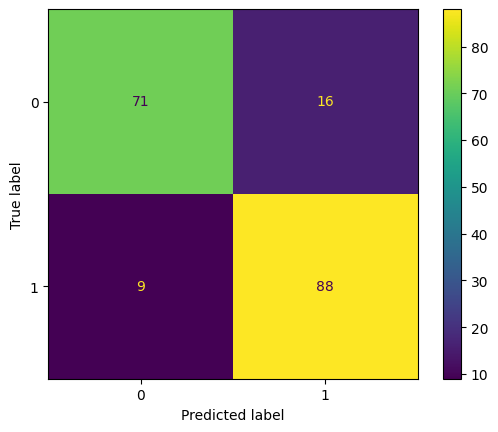

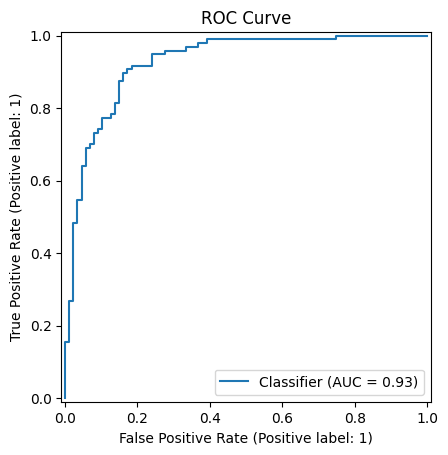

Kernel: Sigmoid
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        87
           1       0.64      0.65      0.65        97

    accuracy                           0.62       184
   macro avg       0.62      0.62      0.62       184
weighted avg       0.62      0.62      0.62       184

Cross Validation (mean ± std): 66.76% ± 4.62%
ROC AUC Score: 73.16%
F1 Score: 64.62%


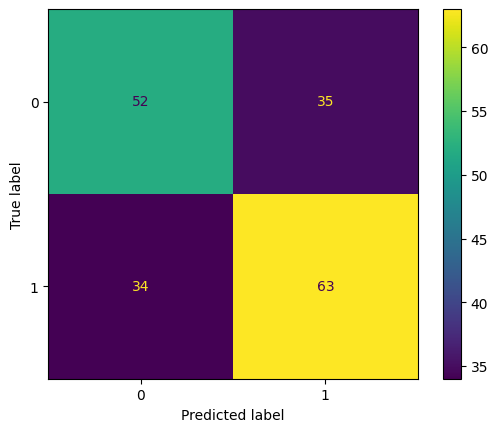

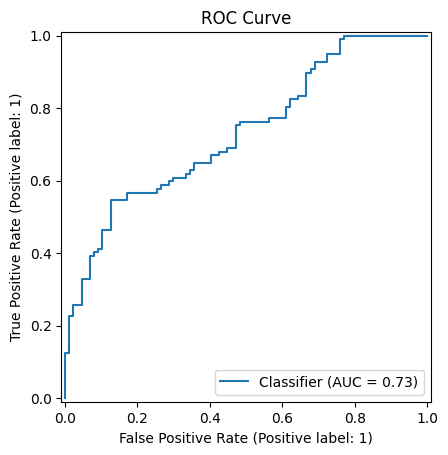

Kernel: rbf
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        87
           1       0.83      0.95      0.88        97

    accuracy                           0.87       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

Cross Validation (mean ± std): 85.42% ± 3.20%
ROC AUC Score: 92.51%
F1 Score: 88.46%


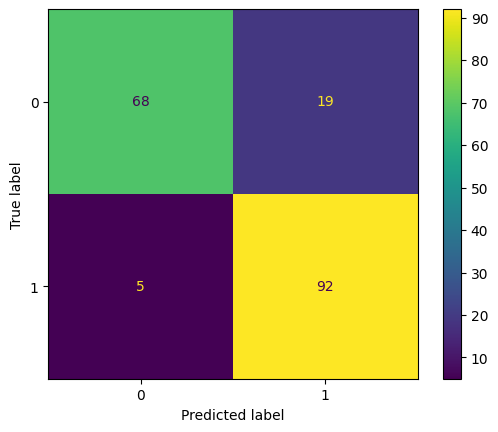

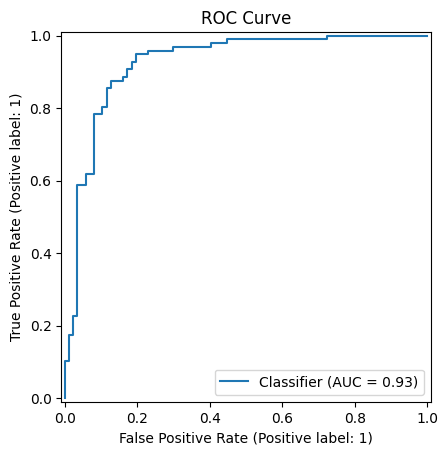

Kernel: Poly
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        87
           1       0.85      0.91      0.88        97

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 84.33% ± 2.46%
ROC AUC Score: 94.86%
F1 Score: 87.56%


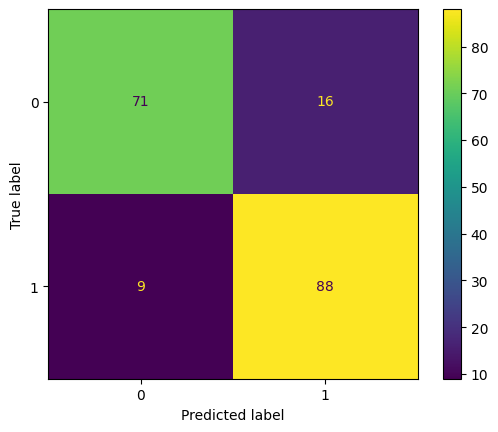

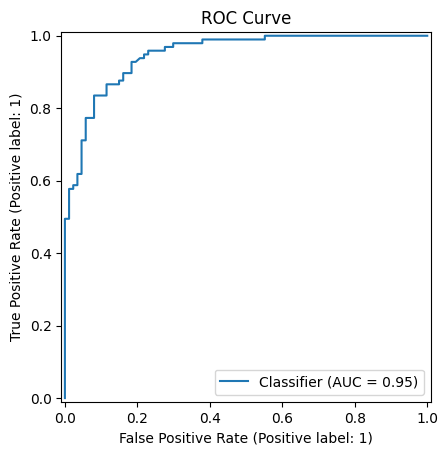

In [59]:
from sklearn.svm import SVC

kernel = []
print("Kernel: linear")
classifier = SVC(kernel='linear', probability=True)
kernel.append(evaluate(classifier)["f1"])

print("Kernel: Sigmoid")
classifier = SVC(kernel='sigmoid', probability=True)
kernel.append(evaluate(classifier)["f1"])

print("Kernel: rbf")
classifier = SVC(kernel='rbf', probability=True)
kernel.append(evaluate(classifier)["f1"])

print("Kernel: Poly")
classifier = SVC(kernel='poly', probability=True)
kernel.append(evaluate(classifier)["f1"])

C: 0.1
              precision    recall  f1-score   support

           0       0.92      0.75      0.82        87
           1       0.81      0.94      0.87        97

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.84       184
weighted avg       0.86      0.85      0.85       184

Cross Validation (mean ± std): 83.11% ± 2.92%
ROC AUC Score: 91.67%
F1 Score: 86.67%


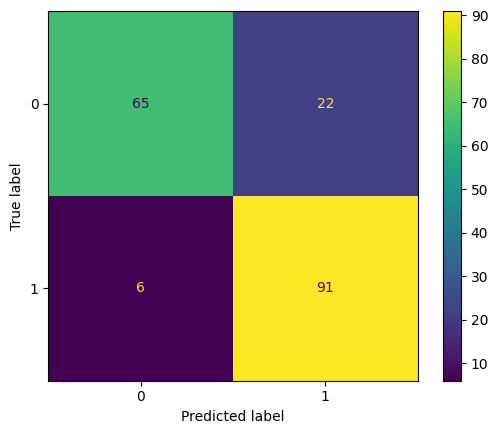

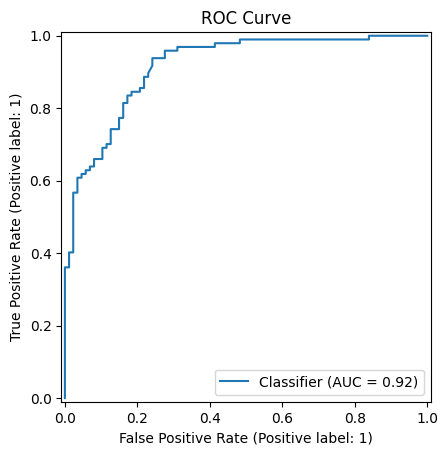

C: 1
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        87
           1       0.83      0.95      0.88        97

    accuracy                           0.87       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

Cross Validation (mean ± std): 85.42% ± 3.20%
ROC AUC Score: 92.51%
F1 Score: 88.46%


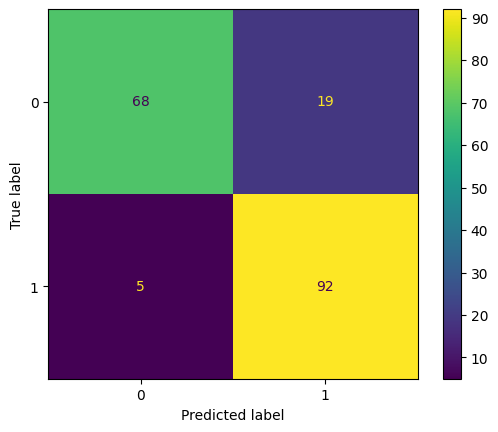

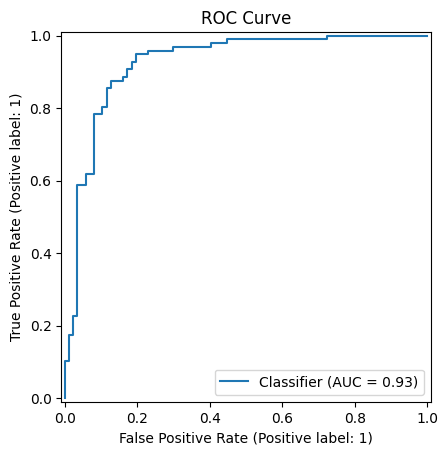

C: 10
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        87
           1       0.85      0.95      0.90        97

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

Cross Validation (mean ± std): 83.79% ± 3.52%
ROC AUC Score: 93.96%
F1 Score: 89.76%


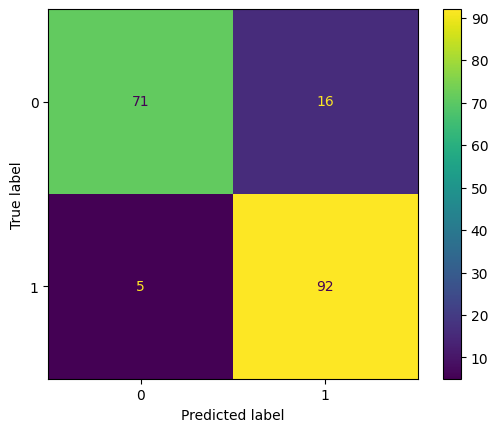

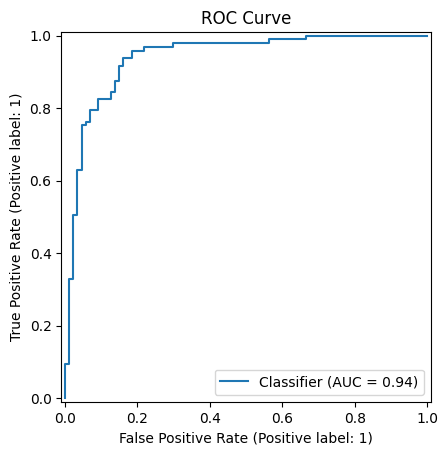

C: 100
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.81      0.84      0.82        97

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184

Cross Validation (mean ± std): 82.97% ± 3.37%
ROC AUC Score: 88.98%
F1 Score: 82.23%


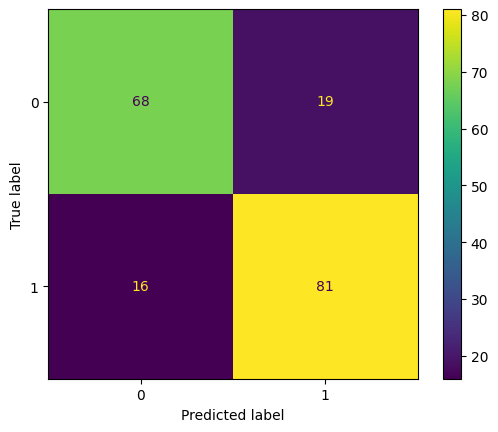

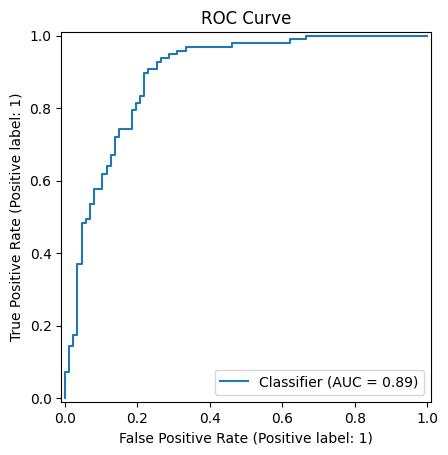

{'report': '              precision    recall  f1-score   support\n\n           0       0.81      0.78      0.80        87\n           1       0.81      0.84      0.82        97\n\n    accuracy                           0.81       184\n   macro avg       0.81      0.81      0.81       184\nweighted avg       0.81      0.81      0.81       184\n',
 'cv': array([0.76870748, 0.85714286, 0.82312925, 0.83673469, 0.8630137 ]),
 'roc_auc': np.float64(0.8897973693565588),
 'f1': 0.8223350253807107}

In [60]:
print("C: 0.1")
classifier = SVC(C=0.1, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 1")
classifier = SVC(C=1, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 10")
classifier = SVC(C=10, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 100")
classifier = SVC(C=100, kernel='rbf', probability=True)
evaluate(classifier)


C: 0.1
              precision    recall  f1-score   support

           0       0.92      0.75      0.82        87
           1       0.81      0.94      0.87        97

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.84       184
weighted avg       0.86      0.85      0.85       184

Cross Validation (mean ± std): 83.11% ± 2.92%
ROC AUC Score: 91.67%
F1 Score: 86.67%


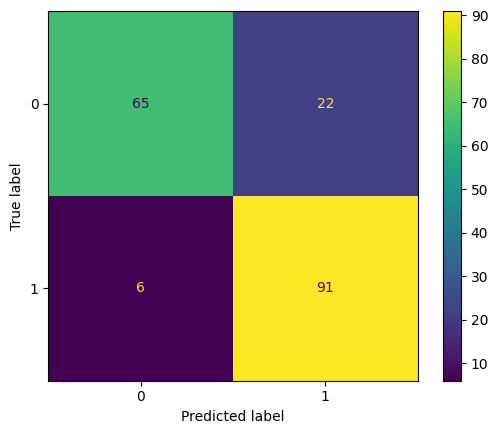

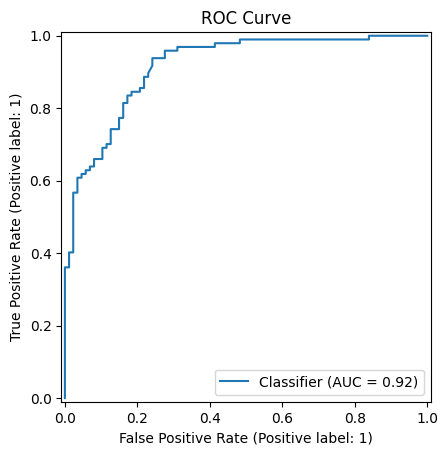

C: 1
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        87
           1       0.83      0.95      0.88        97

    accuracy                           0.87       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

Cross Validation (mean ± std): 85.42% ± 3.20%
ROC AUC Score: 92.51%
F1 Score: 88.46%


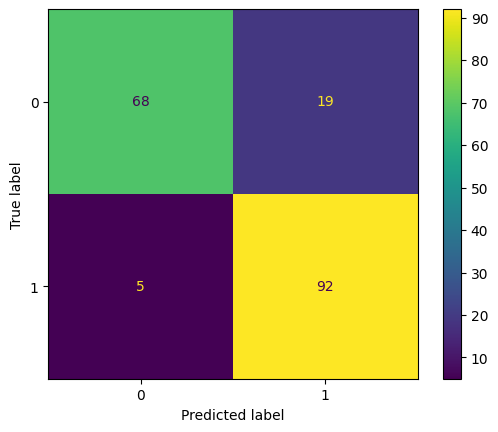

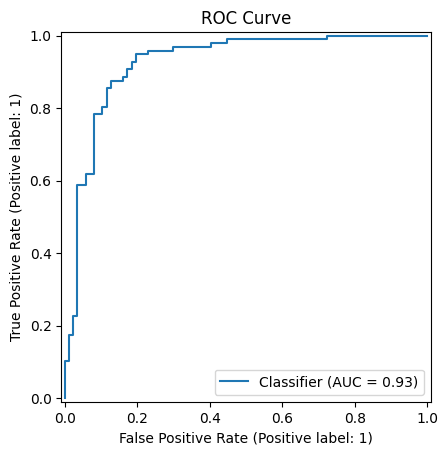

C: 2
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        87
           1       0.85      0.96      0.90        97

    accuracy                           0.89       184
   macro avg       0.90      0.88      0.88       184
weighted avg       0.89      0.89      0.88       184

Cross Validation (mean ± std): 85.56% ± 3.05%
ROC AUC Score: 94.35%
F1 Score: 89.86%


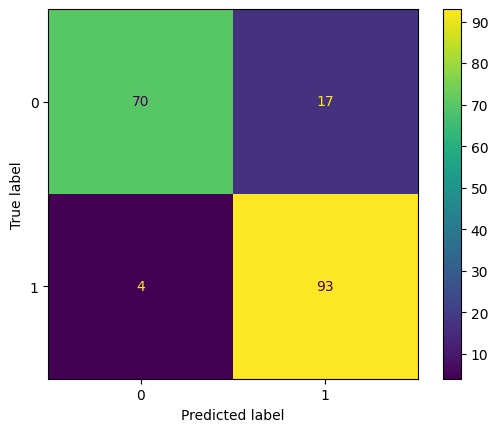

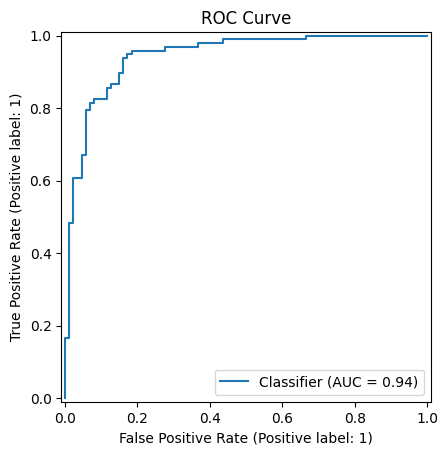

C: 3
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        87
           1       0.86      0.95      0.90        97

    accuracy                           0.89       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.89      0.89       184

Cross Validation (mean ± std): 85.01% ± 2.95%
ROC AUC Score: 94.51%
F1 Score: 90.20%


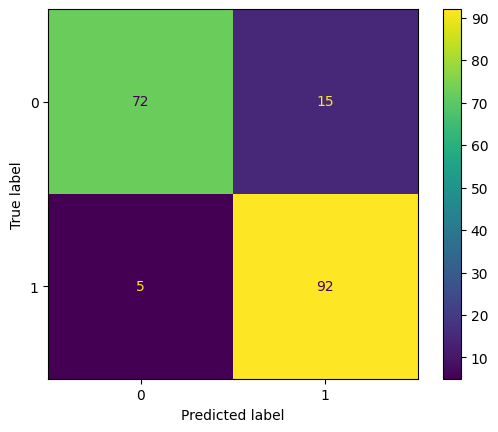

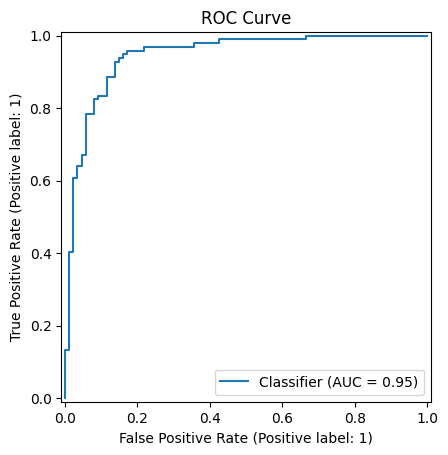

C: 4
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        87
           1       0.86      0.96      0.91        97

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184

Cross Validation (mean ± std): 84.74% ± 3.46%
ROC AUC Score: 94.42%
F1 Score: 90.73%


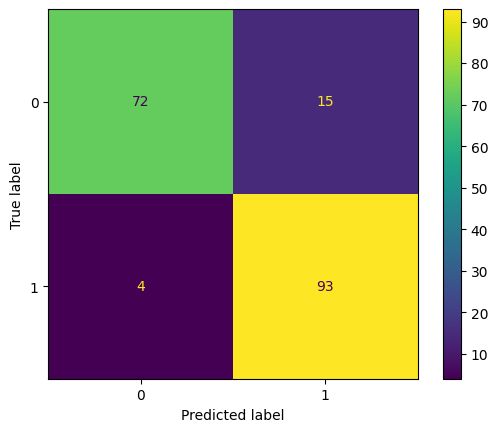

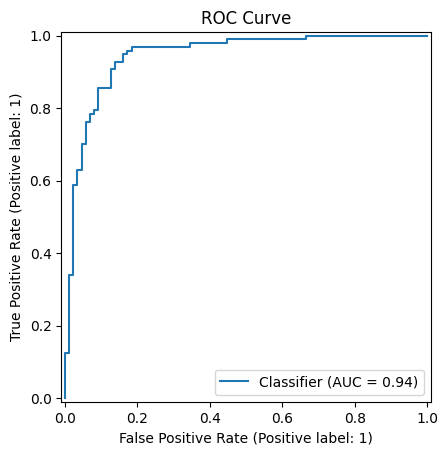

C: 5
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        87
           1       0.87      0.96      0.91        97

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.90      0.90       184

Cross Validation (mean ± std): 84.74% ± 3.34%
ROC AUC Score: 94.44%
F1 Score: 91.18%


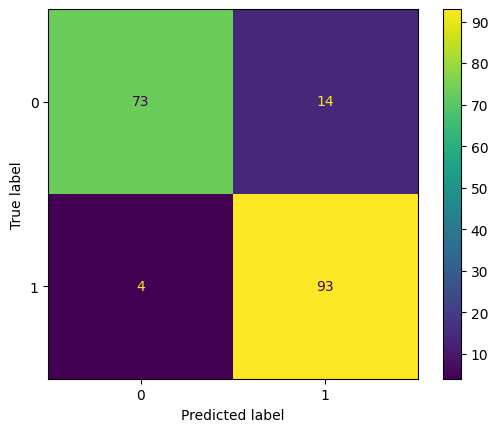

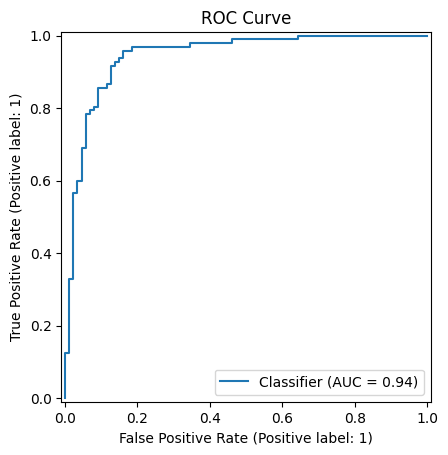

C: 6
              precision    recall  f1-score   support

           0       0.94      0.84      0.88        87
           1       0.87      0.95      0.91        97

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184

Cross Validation (mean ± std): 84.74% ± 3.05%
ROC AUC Score: 94.44%
F1 Score: 90.64%


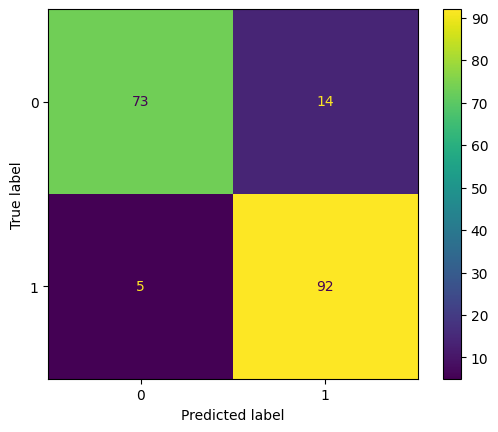

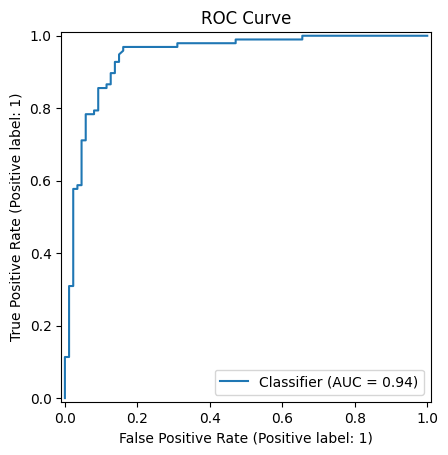

C: 7
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        87
           1       0.88      0.95      0.91        97

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

Cross Validation (mean ± std): 84.61% ± 3.63%
ROC AUC Score: 94.36%
F1 Score: 91.09%


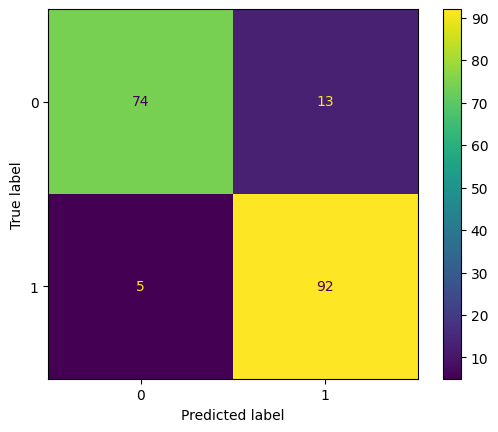

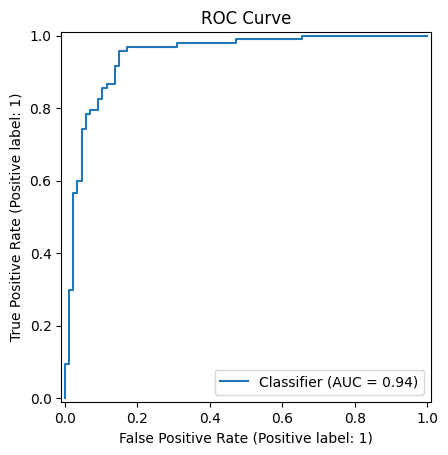

C: 8
              precision    recall  f1-score   support

           0       0.94      0.84      0.88        87
           1       0.87      0.95      0.91        97

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184

Cross Validation (mean ± std): 84.20% ± 4.06%
ROC AUC Score: 94.26%
F1 Score: 90.64%


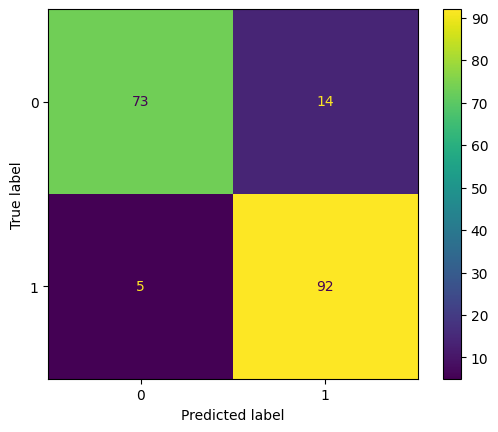

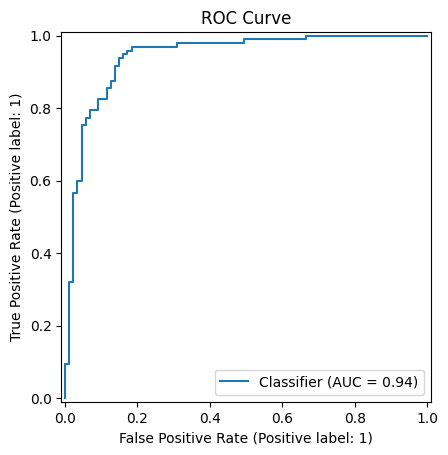

C: 9
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        87
           1       0.86      0.95      0.90        97

    accuracy                           0.89       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.89      0.89       184

Cross Validation (mean ± std): 84.20% ± 4.06%
ROC AUC Score: 94.15%
F1 Score: 90.20%


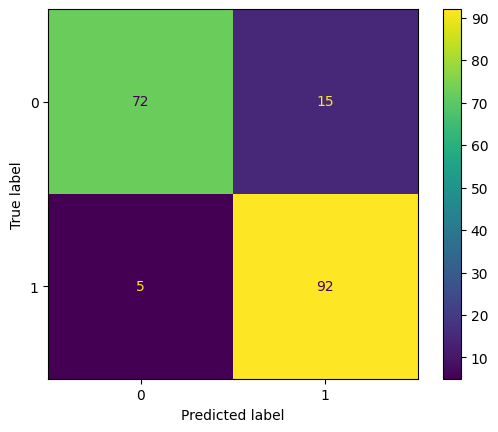

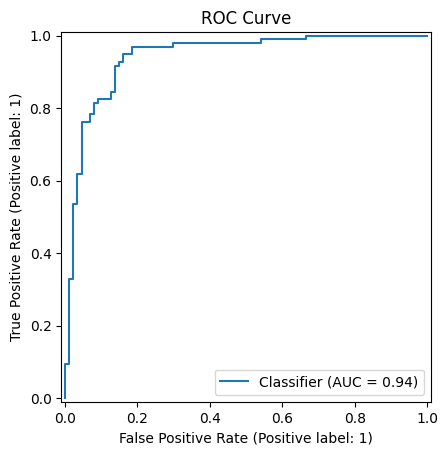

In [61]:
c = []

for i in range(10):
    if i == 0:
        i = 0.1
    print(f"C: {i}")
    classifier = SVC(C=i, kernel='rbf', probability=True)
    c.append(evaluate(classifier)["f1"])


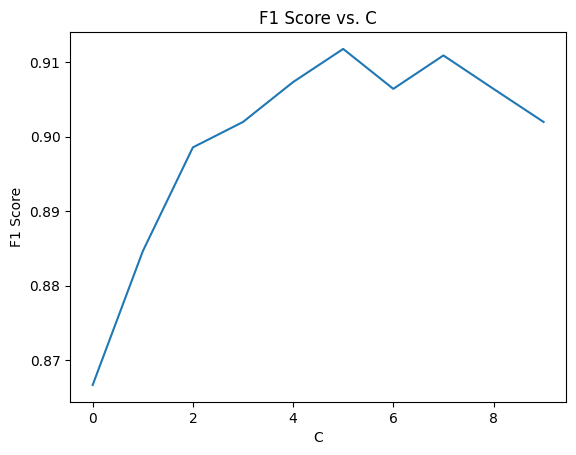

In [62]:
plt.plot(c)
plt.title('F1 Score vs. C')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.show()

gamma: scale
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        87
           1       0.86      0.96      0.91        97

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184

Cross Validation (mean ± std): 84.74% ± 3.46%
ROC AUC Score: 94.42%
F1 Score: 90.73%


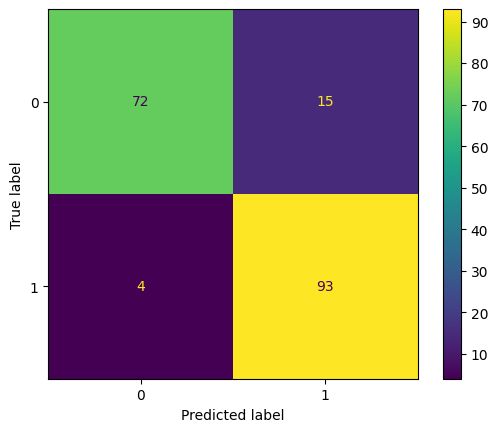

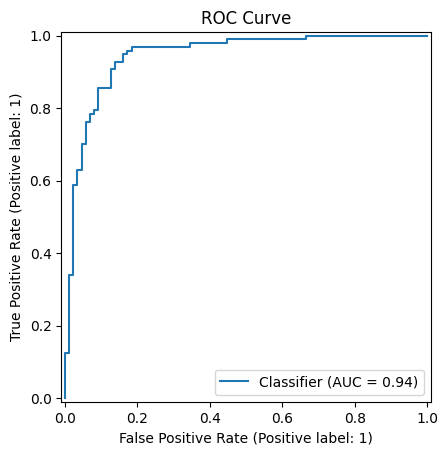

gamma: auto
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        87
           1       0.84      0.92      0.88        97

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 85.15% ± 2.59%
ROC AUC Score: 92.58%
F1 Score: 87.68%


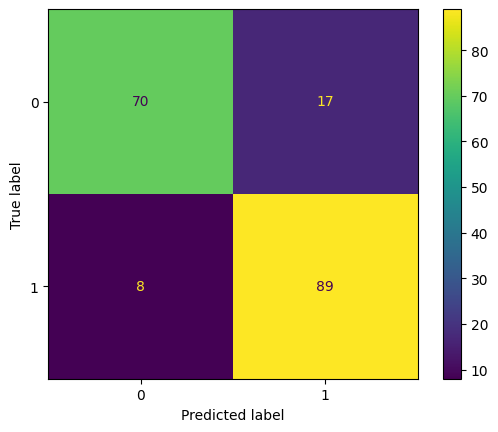

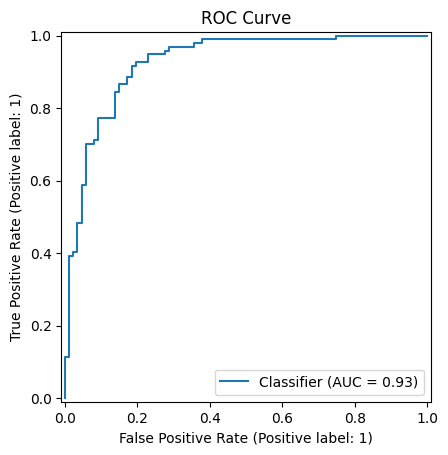

In [63]:
gamma = []
print("gamma: scale")
classifier = SVC(C=4, kernel='rbf', gamma='scale',probability=True)
gamma.append(evaluate(classifier)['f1'])

print("gamma: auto")
classifier = SVC(C=4, kernel='rbf', gamma='auto', probability=True)
gamma.append(evaluate(classifier)['f1'])


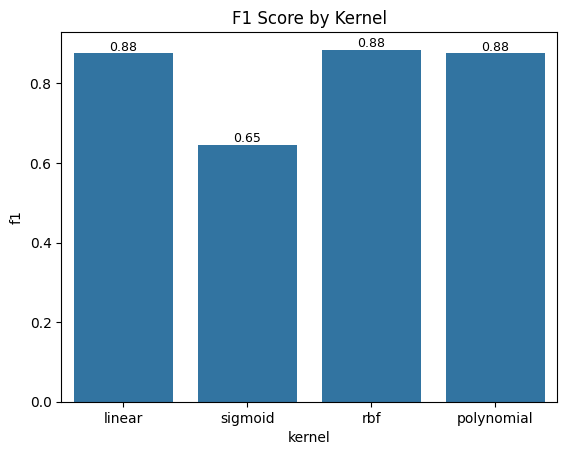

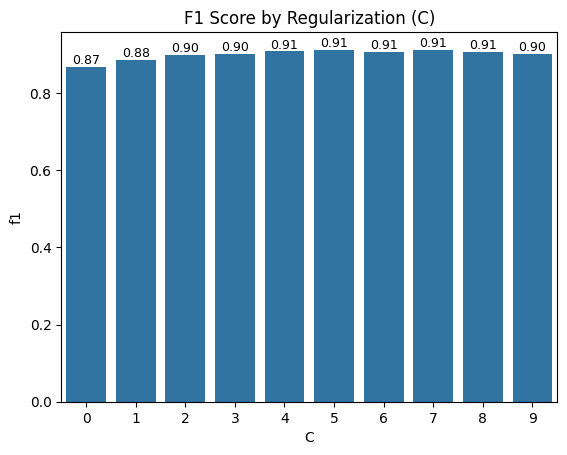

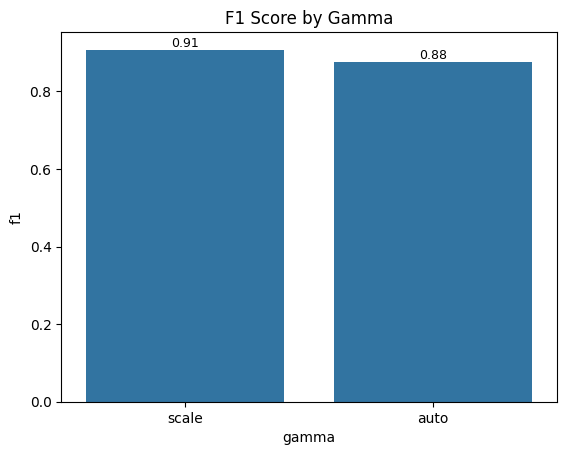

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


kernel_label = ["linear", "sigmoid", "rbf", "polynomial"]
c_label = list(range(10))
gamma_label = ["scale", "auto"]

kernel_results = [{"kernel": label, "f1": kernel[i]} for i, label in enumerate(kernel_label)]
c_results = [{"C": label, "f1": c[i]} for i, label in enumerate(c_label)]
gamma_results = [{"gamma": label, "f1": gamma[i]} for i, label in enumerate(gamma_label)]

df_kernel = pd.DataFrame(kernel_results)
df_c = pd.DataFrame(c_results)
df_gamma = pd.DataFrame(gamma_results)


def plot_bar_with_labels(data, x, y, title):
    ax = sns.barplot(data=data, x=x, y=y)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9)
    plt.title(title)
    plt.show()

plot_bar_with_labels(df_kernel, "kernel", "f1", "F1 Score by Kernel")
plot_bar_with_labels(df_c, "C", "f1", "F1 Score by Regularization (C)")
plot_bar_with_labels(df_gamma, "gamma", "f1", "F1 Score by Gamma")